In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
from imblearn.under_sampling import NearMiss

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report,roc_curve

In [139]:
train_df=pd.read_csv("creditcard.csv")
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
train=train_df.copy()

In [141]:
train_df.shape

(284807, 31)

In [142]:
train_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [143]:
train_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [144]:

train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [145]:
#explore output variable

In [146]:
train_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

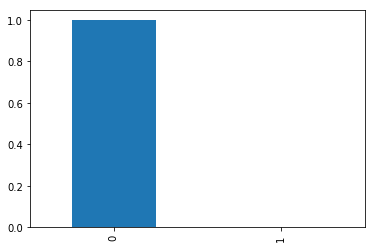

In [147]:
train_df.Class.value_counts(normalize=True).plot(kind='bar')

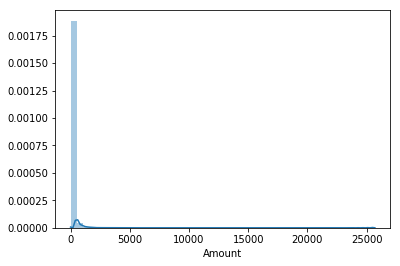

In [148]:
sns.distplot(train_df.Amount)

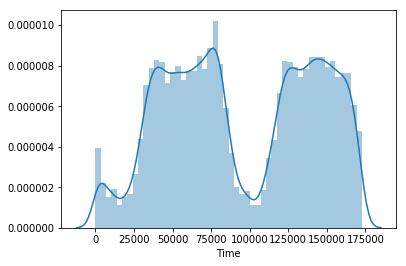

In [149]:
sns.distplot(train_df.Time)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
train_df['Norm_Amount']=StandardScaler().fit_transform(np.array(train_df['Amount']).reshape(-1, 1))
train_df['Norm_Time']=StandardScaler().fit_transform(np.array(train_df['Time']).reshape(-1, 1))

In [152]:
train_df.drop(['Amount','Time'],axis=1,inplace=True)

In [153]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Norm_Amount,Norm_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [154]:
norm_amount=train_df['Norm_Amount']
norm_time=train_df['Norm_Time']
train_df.drop(['Norm_Amount','Norm_Time'],axis=1,inplace=True)
train_df.insert(0, 'scaled_amount', norm_amount)
train_df.insert(1, 'scaled_time', norm_time)

In [155]:
train_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [156]:
X=train_df.drop('Class',axis=1)
y=train_df.Class

In [157]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [158]:
print("***********Shape************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

***********Shape************
(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [159]:
#Random under sampling

In [160]:
train_df=train_df.sample(frac=1)

In [161]:
fraud_df=train_df.loc[train_df['Class']==1]
nonfraud_df=train_df[train_df['Class']==0][:492]

In [162]:
nonfraud_df.shape

(492, 31)

In [163]:
fraud_df.shape

(492, 31)

In [164]:
normal_distributed_df=pd.concat([fraud_df,nonfraud_df])
new_df=normal_distributed_df.sample(frac=1,random_state=42)

In [165]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
53341,-0.350191,-1.029414,0.296938,1.068936,-0.502713,0.395033,0.111819,-0.383775,-0.765638,-2.670152,...,0.528225,-1.373580,-0.004965,-0.037169,-0.134359,0.718224,0.362645,-0.036042,0.146064,0
31002,0.093357,-1.234918,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1
138930,1.953346,-0.250397,-0.023821,-2.322217,0.486864,0.664224,-1.357674,1.103572,-0.186298,0.368991,...,0.987563,0.213186,-0.414093,-0.366108,-0.202543,-0.265170,0.893806,-0.113044,0.096005,0
274475,-0.193706,1.499622,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,1
92777,0.825806,-0.646918,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,...,-0.815086,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,1


In [166]:
new_df['Class'].value_counts()/len(new_df)

1    0.5
0    0.5
Name: Class, dtype: float64

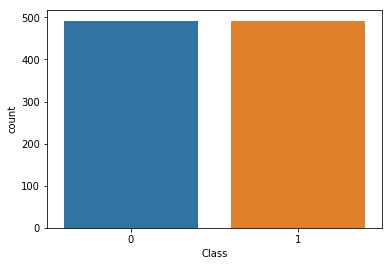

In [167]:
sns.countplot('Class',data=new_df)
plt.show()

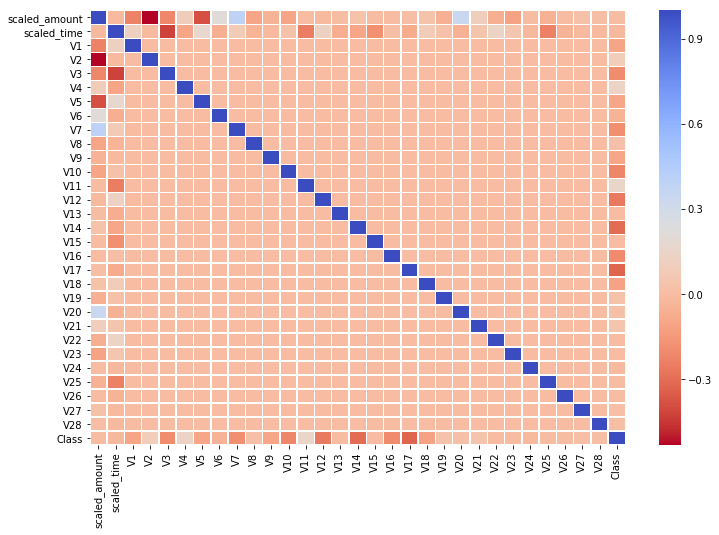

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
corr=train_df.corr()
sns.heatmap(corr,cmap='coolwarm_r',linewidths=.5, ax=ax)

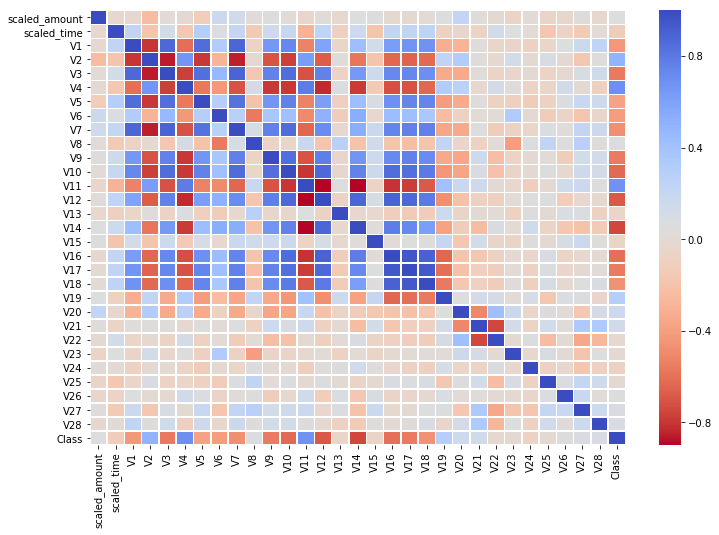

In [169]:
fig, ax = plt.subplots(figsize=(12,8))
subcorr=new_df.corr()
sns.heatmap(subcorr,cmap='coolwarm_r',linewidths=.5, ax=ax)

In [170]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [171]:
X.shape

(984, 30)

In [172]:
X.values

array([[-3.50190847e-01, -1.02941364e+00,  2.96937758e-01, ...,
         3.62644908e-01, -3.60420950e-02,  1.46063884e-01],
       [ 9.33568349e-02, -1.23491792e+00, -5.68501342e+00, ...,
        -4.94467232e-02,  3.03444582e-01,  2.19380439e-01],
       [ 1.95334649e+00, -2.50396814e-01, -2.38212020e-02, ...,
         8.93806208e-01, -1.13044023e-01,  9.60046048e-02],
       ...,
       [-1.53325083e-01,  1.12380117e+00,  1.92481467e+00, ...,
        -6.84120572e-01,  3.00587746e-02, -1.70655733e-02],
       [-1.14623609e-01, -1.12678548e+00, -1.29809426e+01, ...,
        -6.16785819e-03, -1.18569551e+00, -7.47361321e-01],
       [ 2.51399812e+00, -1.30704131e+00, -2.17913506e+00, ...,
         6.91774506e-01,  1.96778974e-01,  2.41085157e-01]])

In [173]:
x_reduced=TSNE(n_components=2,random_state=42).fit_transform(X.values)
x_reduced.shape

(984, 2)

In [174]:
x_reduced_pca=PCA(n_components=2,random_state=42).fit_transform(X.values)
x_reduced_pca.shape

(984, 2)

In [175]:
x_reduced_svd=TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
x_reduced_svd.shape

(984, 2)

In [176]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
53341,-0.350191,-1.029414,0.296938,1.068936,-0.502713,0.395033,0.111819,-0.383775,-0.765638,-2.670152,...,0.528225,-1.373580,-0.004965,-0.037169,-0.134359,0.718224,0.362645,-0.036042,0.146064,0
31002,0.093357,-1.234918,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1
138930,1.953346,-0.250397,-0.023821,-2.322217,0.486864,0.664224,-1.357674,1.103572,-0.186298,0.368991,...,0.987563,0.213186,-0.414093,-0.366108,-0.202543,-0.265170,0.893806,-0.113044,0.096005,0
274475,-0.193706,1.499622,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,1
92777,0.825806,-0.646918,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,...,-0.815086,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,1


In [177]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
x_train=x_train.values
x_test=x_test.values
y_train=y_train.values
y_test=y_test.values

In [180]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [181]:
for key,classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    train_score=cross_val_score(classifier,x_train,y_train,cv=5)
    print(classifier.__class__.__name__,"==",round(train_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression == 94.0 % accuracy score
KNeighborsClassifier == 94.0 % accuracy score
SVC == 94.0 % accuracy score
DecisionTreeClassifier == 91.0 % accuracy score


In [182]:
print("-------Logistic Regression----------")
log_params={"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log=GridSearchCV(LogisticRegression(),log_params)
grid_log.fit(x_train,y_train)
log_reg = grid_log.best_estimator_
print(log_reg)
print("-------Knearest Neighbors----------")
knn_param={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(KNeighborsClassifier(),knn_param)
grid_knn.fit(x_train,y_train)
knearest_param=grid_knn.best_estimator_
print(knearest_param)
print("-------Decision Tree----------")
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf=grid_tree.best_estimator_
print(tree_clf)

-------Logistic Regression----------
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
-------Knearest Neighbors----------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
-------Decision Tree----------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None

In [183]:
log_reg_score=cross_val_score(log_reg,x_train,y_train,cv=5)
print(round(log_reg_score.mean()*100,2))
knn_score=cross_val_score(knearest_param,x_train,y_train,cv=5)
print(round(knn_score.mean()*100,2))
tree_score=cross_val_score(tree_clf,x_train,y_train,cv=5)
print(round(tree_score.mean()*100,2))

94.41
93.65
91.24


In [184]:
# We will undersample during cross validating
undersample_X = train_df.drop('Class', axis=1)
undersample_y = train_df['Class']

for train_index, test_index in ss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in ss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    

Train: [ 54023  54259  55099 ... 284804 284805 284806] Test: [    0     1     2 ... 56963 56964 56965]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 54023  54259  55099 ... 113921 113922 113923]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113924 113925 113926 ... 170892 170893 170894]
Train: [     0      1      2 ... 284804 284805 284806] Test: [167822 167941 168135 ... 227859 227860 227861]
Train: [     0      1      2 ... 227859 227860 227861] Test: [216811 217383 218581 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [189]:
log_reg_pred = cross_val_predict(log_reg, x_train, y_train, cv=5,method="decision_function")
knears_pred = cross_val_predict(knearest_param, x_train, y_train, cv=5)
tree_pred = cross_val_predict(tree_clf, x_train, y_train, cv=5)

In [190]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9768017581281105
KNears Neighbors:  0.9349266369336178
Decision Tree Classifier:  0.911469846810161
